<a href="https://colab.research.google.com/github/ibe-abu-chi/python_EDA/blob/master/age_specific_mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
df = pd.read_csv('/content/IHME_GBD_2010_MORTALITY_AGE_SPECIFIC_BY_COUNTRY_1970_2010.csv')

In [27]:

df.head()

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
0,AFG,Afghanistan,1970,0-6 days,Male,"19,241","318,292.90"
1,AFG,Afghanistan,1970,0-6 days,Female,"12,600","219,544.20"
2,AFG,Afghanistan,1970,0-6 days,Both,"31,840","270,200.70"
3,AFG,Afghanistan,1970,7-27 days,Male,"15,939","92,701.00"
4,AFG,Afghanistan,1970,7-27 days,Female,"11,287","68,594.50"


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country Code            58905 non-null  object
 1   Country Name            58905 non-null  object
 2   Year                    58905 non-null  int64 
 3   Age Group               58905 non-null  object
 4   Sex                     58905 non-null  object
 5   Number of Deaths        58905 non-null  object
 6   Death Rate Per 100,000  58905 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [29]:
df["Num_Deaths"] = df["Number of Deaths"].apply(lambda x: int(x.replace(",", "")))
df["Num_Death_100,000"] = df["Death Rate Per 100,000"].apply(lambda x: x.replace(",", "")).astype('float')

In [30]:
df = df.drop(['Number of Deaths', 'Death Rate Per 100,000'], axis = 1)

In [31]:
df.shape

(58905, 7)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Code       58905 non-null  object 
 1   Country Name       58905 non-null  object 
 2   Year               58905 non-null  int64  
 3   Age Group          58905 non-null  object 
 4   Sex                58905 non-null  object 
 5   Num_Deaths         58905 non-null  int64  
 6   Num_Death_100,000  58905 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.1+ MB


In [33]:
df.describe()

,Year,Num_Deaths,"Num_Death_100,000"
count,58905.000000,5.890500e+04,58905.000000
mean,1990.000000,1.610994e+04,7062.866458
std,14.142256,1.543293e+05,24582.548947
min,1970.000000,0.000000e+00,5.500000
25%,1980.000000,1.660000e+02,210.300000
50%,1990.000000,1.020000e+03,825.000000
75%,2000.000000,4.460000e+03,3611.800000
max,2010.000000,9.938487e+06,423790.200000


In [34]:
df = df.set_index("Country Code")
df = df.sort_index()
df.head()

,Country Name,Year,Age Group,Sex,Num_Deaths,"Num_Death_100,000"
Country Code,,,,,,
AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9
AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2
AFG,Afghanistan,1970,0-6 days,Both,31840,270200.7
AFG,Afghanistan,1970,7-27 days,Male,15939,92701.0
AFG,Afghanistan,1970,7-27 days,Female,11287,68594.5


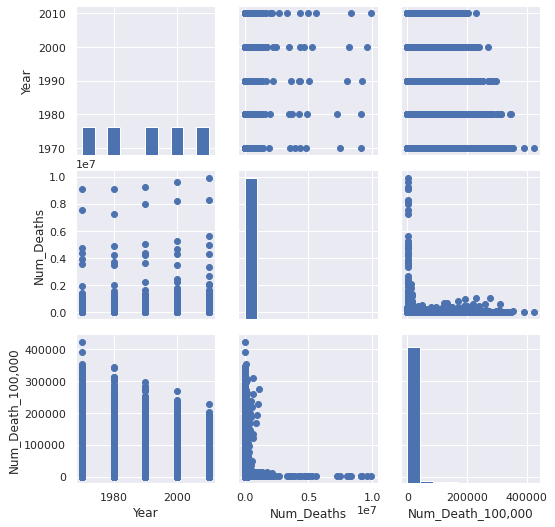

In [25]:

g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [36]:
df['Country Name'].value_counts()

Afghanistan          315
New Zealand          315
Malawi               315
Malaysia             315
Namibia              315
                    ... 
Guinea               315
Gambia               315
Guinea-Bissau        315
Equatorial Guinea    315
Zimbabwe             315
Name: Country Name, Length: 187, dtype: int64

In [37]:
df['Year'].value_counts()

1970    11781
1980    11781
1990    11781
2000    11781
2010    11781
Name: Year, dtype: int64

In [38]:
df['Age Group'].value_counts()

0-6 days       2805
40-44 years    2805
80+ years      2805
75-79 years    2805
70-74 years    2805
65-69 years    2805
60-64 years    2805
55-59 years    2805
50-54 years    2805
45-49 years    2805
35-39 years    2805
7-27 days      2805
30-34 years    2805
25-29 years    2805
20-24 years    2805
15-19 years    2805
10-14 years    2805
5-9 years      2805
1-4 years      2805
28-364 days    2805
All ages       2805
Name: Age Group, dtype: int64

In [40]:
df['Sex'].value_counts()

Male      19635
Female    19635
Both      19635
Name: Sex, dtype: int64

In [44]:
df[['Num_Deaths','Num_Death_100,000']].groupby(df['Country Name']).sum()

,Num_Deaths,"Num_Death_100,000"
Country Name,,
Afghanistan,5687183,4429976.4
Albania,349413,962339.2
Algeria,3322568,2481166.7
Andorra,8215,619746.6
Angola,3405986,3389346.8
...,...,...
Venezuela,1891674,1386227.8
Viet Nam,8947408,1774119.5
Yemen,2697944,3787465.4


In [49]:
# let's check the Country Name in line with this parameters:'Age Group','Sex','Numeric_Number of Deaths','Numeric_Death Rate Per 100,000'
def Country_Name(x):
    return df[(df['Country Name'] == x)][['Age Group','Sex','Num_Deaths','Num_Death_100,000']]
Country_Name("Ghana")

,Age Group,Sex,Num_Deaths,"Num_Death_100,000"
Country Code,,,,
GHA,0-6 days,Male,8092,204034.1
GHA,0-6 days,Female,5395,142832.5
GHA,0-6 days,Both,13487,174180.3
GHA,7-27 days,Male,2984,25779.5
GHA,7-27 days,Female,2123,19132.3
...,...,...,...,...
GHA,80+ years,Female,7831,11848.7
GHA,80+ years,Both,14952,12409.9
GHA,All ages,Male,97729,787.5


In [46]:
# let's check mae sex in line with this parameters:'Year','Age Group','Numeric_Number of Deaths','Numeric_Death Rate Per 100,000'
def Sex_count(x):
    return df[(df['Sex'] == x)][['Year','Age Group','Num_Deaths','Num_Death_100,000']]
Sex_count("Male")

,Year,Age Group,Num_Deaths,"Num_Death_100,000"
Country Code,,,,
AFG,1970,0-6 days,19241,318292.9
AFG,1970,7-27 days,15939,92701.0
AFG,1970,28-364 days,37513,15040.1
AFG,1970,1-4 years,36694,4288.2
AFG,1970,5-9 years,3467,396.2
...,...,...,...,...
ZWE,2010,65-69 years,4687,5173.3
ZWE,2010,70-74 years,4921,7396.0
ZWE,2010,75-79 years,4407,10365.2


In [47]:
# let's check female in line with this parameters:'Year','Age Group','Sex','Numeric_Number of Deaths','Numeric_Death Rate Per 100,000'
def Sex_count(x):
    return df[(df['Sex'] == x)][['Year','Age Group','Num_Deaths','Num_Death_100,000']]
Sex_count("Female")

,Year,Age Group,Num_Deaths,"Num_Death_100,000"
Country Code,,,,
AFG,1970,0-6 days,12600,219544.2
AFG,1970,7-27 days,11287,68594.5
AFG,1970,28-364 days,32113,13411.8
AFG,1970,1-4 years,32848,4022.9
AFG,1970,5-9 years,2492,306.0
...,...,...,...,...
ZWE,2010,65-69 years,5332,4682.2
ZWE,2010,70-74 years,4677,5755.0
ZWE,2010,75-79 years,4720,8713.0


In [48]:
# let's check the Country Name in line with this parameters:'Year','Age Group','Sex','Numeric_Number of Deaths','Numeric_Death Rate Per 100,000'
def Sex_count(x):
    return df[(df['Sex'] == x)][['Year','Age Group','Num_Deaths','Num_Death_100,000']]
Sex_count("Both")

,Year,Age Group,Num_Deaths,"Num_Death_100,000"
Country Code,,,,
AFG,1970,0-6 days,31840,270200.7
AFG,1970,7-27 days,27226,80912.5
AFG,1970,28-364 days,69626,14242.6
AFG,1970,1-4 years,69542,4158.6
AFG,1970,5-9 years,5959,352.7
...,...,...,...,...
ZWE,2010,65-69 years,10019,4899.8
ZWE,2010,70-74 years,9597,6493.7
ZWE,2010,75-79 years,9128,9439.6


In [51]:
# People that are females in Nigeria:
Country_Name("Nigeria")[Country_Name("Nigeria").Sex == 'Both']

,Age Group,Sex,Num_Deaths,"Num_Death_100,000"
Country Code,,,,
NGA,0-6 days,Both,123082,248128.2
NGA,7-27 days,Both,53731,37405.8
NGA,28-364 days,Both,172667,7954.2
NGA,1-4 years,Both,337922,4419.5
NGA,5-9 years,Both,26636,337.7
...,...,...,...,...
NGA,65-69 years,Both,62610,2711.8
NGA,70-74 years,Both,62489,3991.2
NGA,75-79 years,Both,54979,6046.4
